In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [132]:
#To load the dataset
df = pd.read_csv(r"C:\Users\Aaditya Adyot\Downloads\Medical Cost Personal Datasets\insurance.csv")

In [53]:
# to see top 5 entries
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
# to see last 5 entries
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [55]:
#to see the random sample in the dataset
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1187,62,female,32.680,0,no,northwest,13844.79720
575,58,female,27.170,0,no,northwest,12222.89830
867,57,male,43.700,1,no,southwest,11576.13000
626,36,male,28.880,3,no,northeast,6748.59120
56,58,female,31.825,2,no,northeast,13607.36875


In [56]:
#to check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observation: dtypes: float64(2), int64(2), object(3)

In [57]:
# to check the null values in the features
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
df[['smoker', 'region']]

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest
...,...,...
1333,no,northwest
1334,no,northeast
1335,no,southeast
1336,no,southwest


In [59]:
# to check the unique values in these feature
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [60]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [61]:
## for smoker and region, we can perform encoding


In [62]:
df['smoker'] = df['smoker'].map({'yes': 1, "no":0})

In [66]:
df= pd.concat([df, pd.get_dummies(df['region'])], axis =1)

In [68]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [71]:
#use label encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])

In [73]:
df.drop('region', axis=1, inplace= True)

In [74]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int32(1), int64(3), uint8(4)
memory usage: 62.8 KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
northeast,1338.0,0.242152,0.428546,0.0000,0.00000,0.000,0.000000,1.00000
northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


# Detecting outliers

1. By using standard deviation method

In [116]:
index_list = []
feature = ['age', 'bmi', 'charges']
for i in feature:
    mean= df[i].mean()
    std = df[i].std()
    cuttoff = std * 3
    index = df[(df[i] < (mean - cuttoff)) | (df[i] > (mean + cuttoff))].index
    index_list.extend(index)

In [123]:
index_list = sorted(set(index_list))
print(f'The no. outlier detected through Standard deviation method is, {len(index_list)}')
print(f'The index of the dataset containing outliers are, {index_list}')

The no. outlier detected through Standard deviation method is, 11
The index of the dataset containing outliers are, [34, 116, 543, 577, 819, 847, 1047, 1146, 1230, 1300, 1317]


2. By using IQR

In [125]:
index_list = []
feature = ['age', 'bmi', 'charges']
for i in feature:
    lower_fence = df[i].quantile(.25)
    higher_fence= df[i].quantile(.75)
    IQR = higher_fence-lower_fence
    q1 = lower_fence - 1.5*IQR
    q2 = higher_fence + 1.5*IQR
    index = df[(df[i] < q1) | (df[i]> q2)].index
    index_list.extend(index)
    

In [126]:
index_list = sorted(set(index_list))
print(f'The no. outlier detected through Standard deviation method is, {len(index_list)}')
print(f'The index of the dataset containing outliers are, {index_list}')

The no. outlier detected through Standard deviation method is, 145
The index of the dataset containing outliers are, [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 116, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 286, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 401, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 847, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1088, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1317, 1323]


3. using Using scatter for numerical feature and boxplot for categorical features

In [127]:
numerical_features = ['age', 'bmi', 'charges']

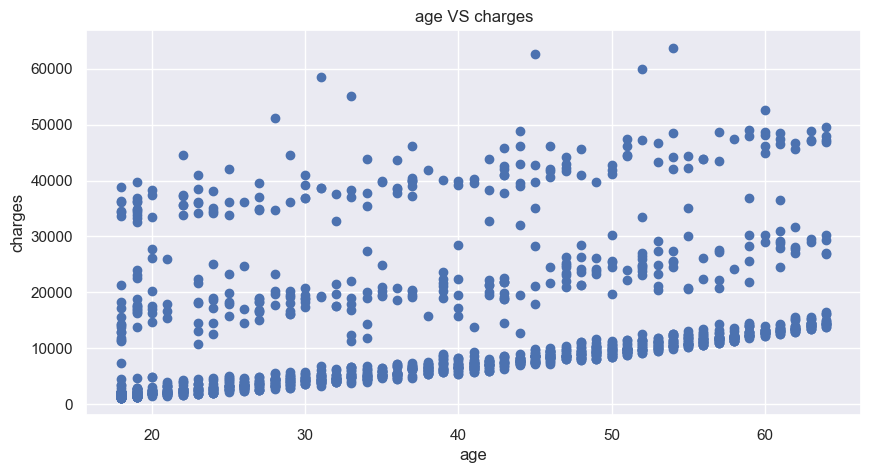

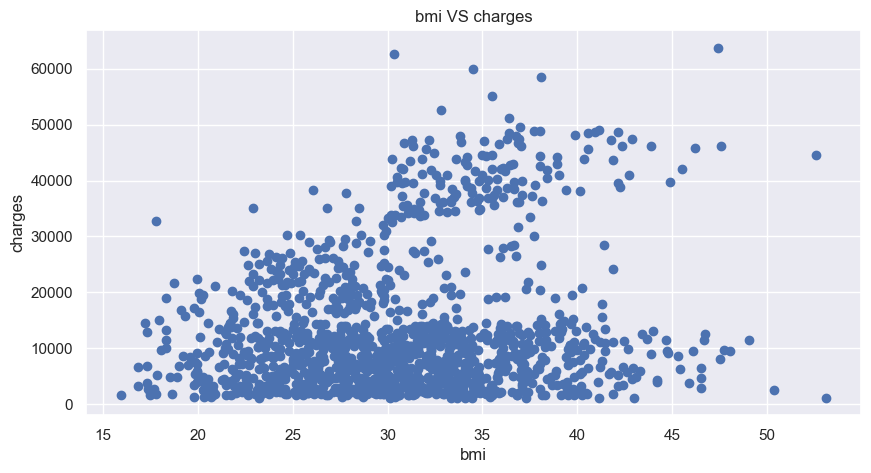

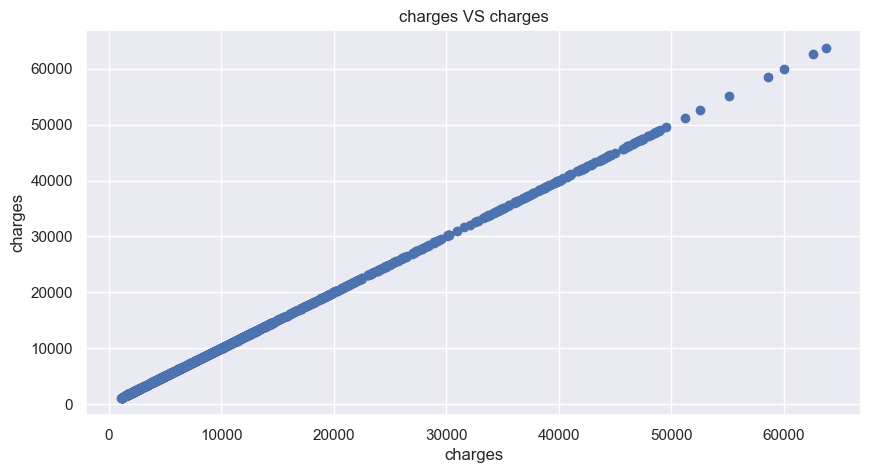

In [129]:
# numericals
for n in numerical_features :
    plt.figure(figsize=(10,5))
    plt.scatter(df[n], df["charges"])
    plt.title(f"{n} VS charges")
    plt.xlabel(f"{n}")
    plt.ylabel("charges")
    plt.show()

In [130]:
categorical_features = ["sex", "children", "smoker", "region"]

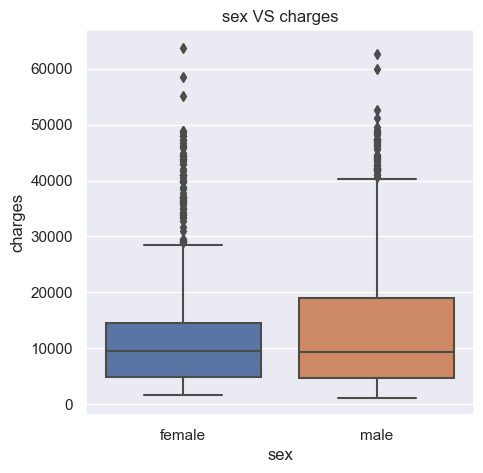

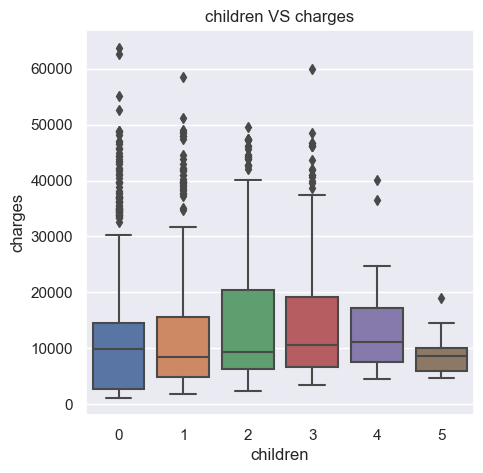

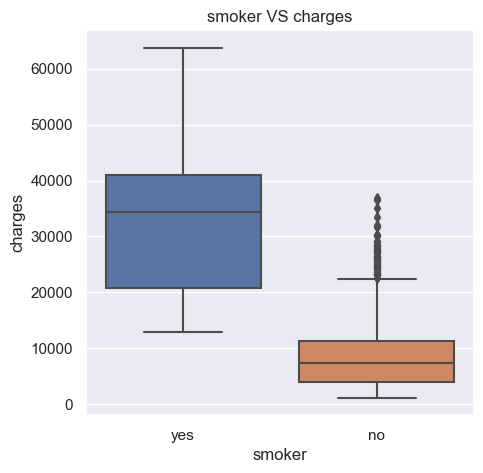

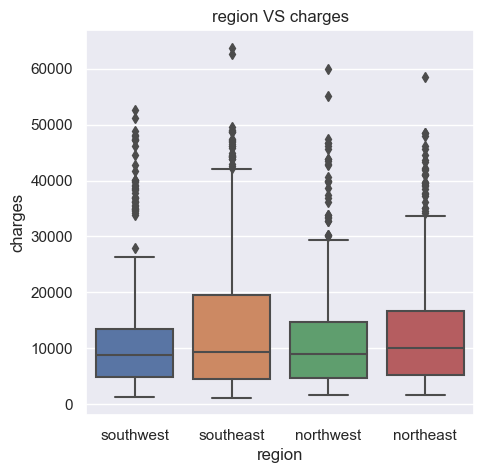

In [135]:
#categoricals
for n in categorical_features :
    plt.figure(figsize=(5,5))
    sns.boxplot(x=n, y="charges", data=df)
    plt.title(f"{n} VS charges")
    plt.show()

##### There are some outliers in our dataset. But it doesn't mean that they are false values or I should remove them. Also the number of samples are low.

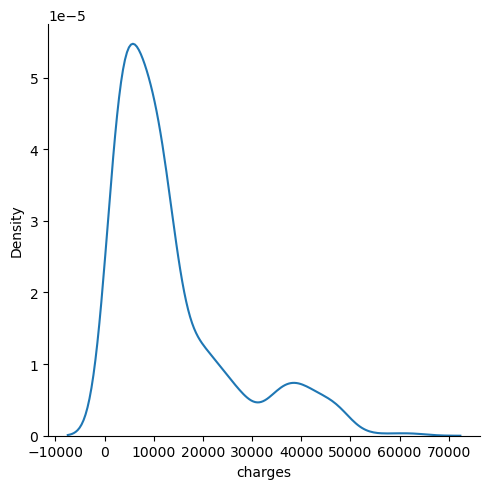

In [20]:
sns.displot(df['charges'], kind='kde')

<Axes: >

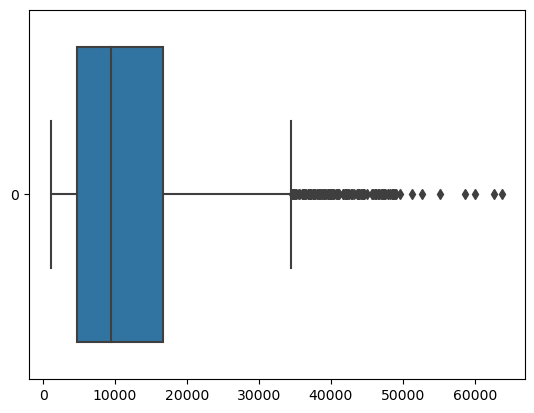

In [22]:
sns.boxplot(df['charges'], orient='h')

<Axes: >

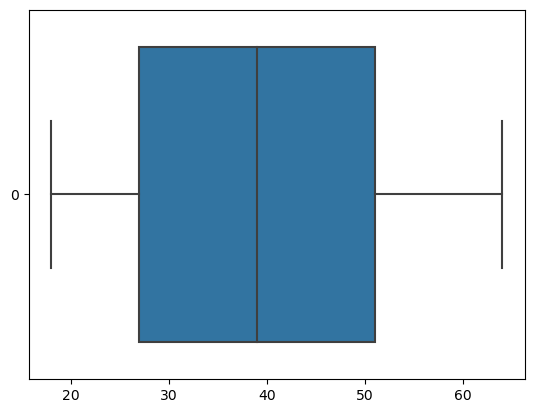

In [80]:
sns.boxplot(df['age'], orient='h')

<Axes: >

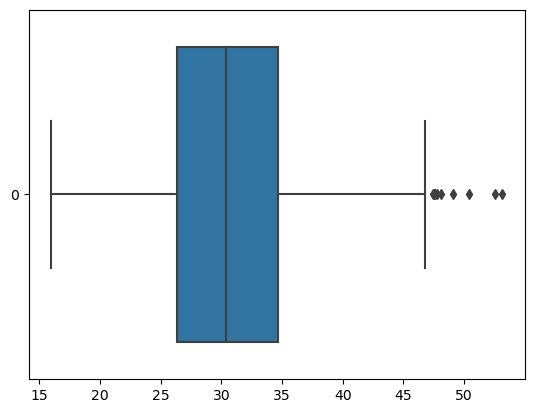

In [82]:
sns.boxplot(df['bmi'], orient='h')

<Axes: xlabel='sex', ylabel='smoker'>

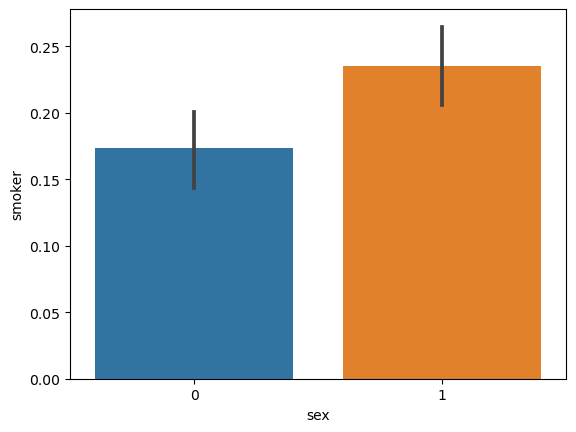

In [89]:
sns.barplot(x='sex', y='smoker', data=df)

Observation: Male sex smokes more than the female sex.

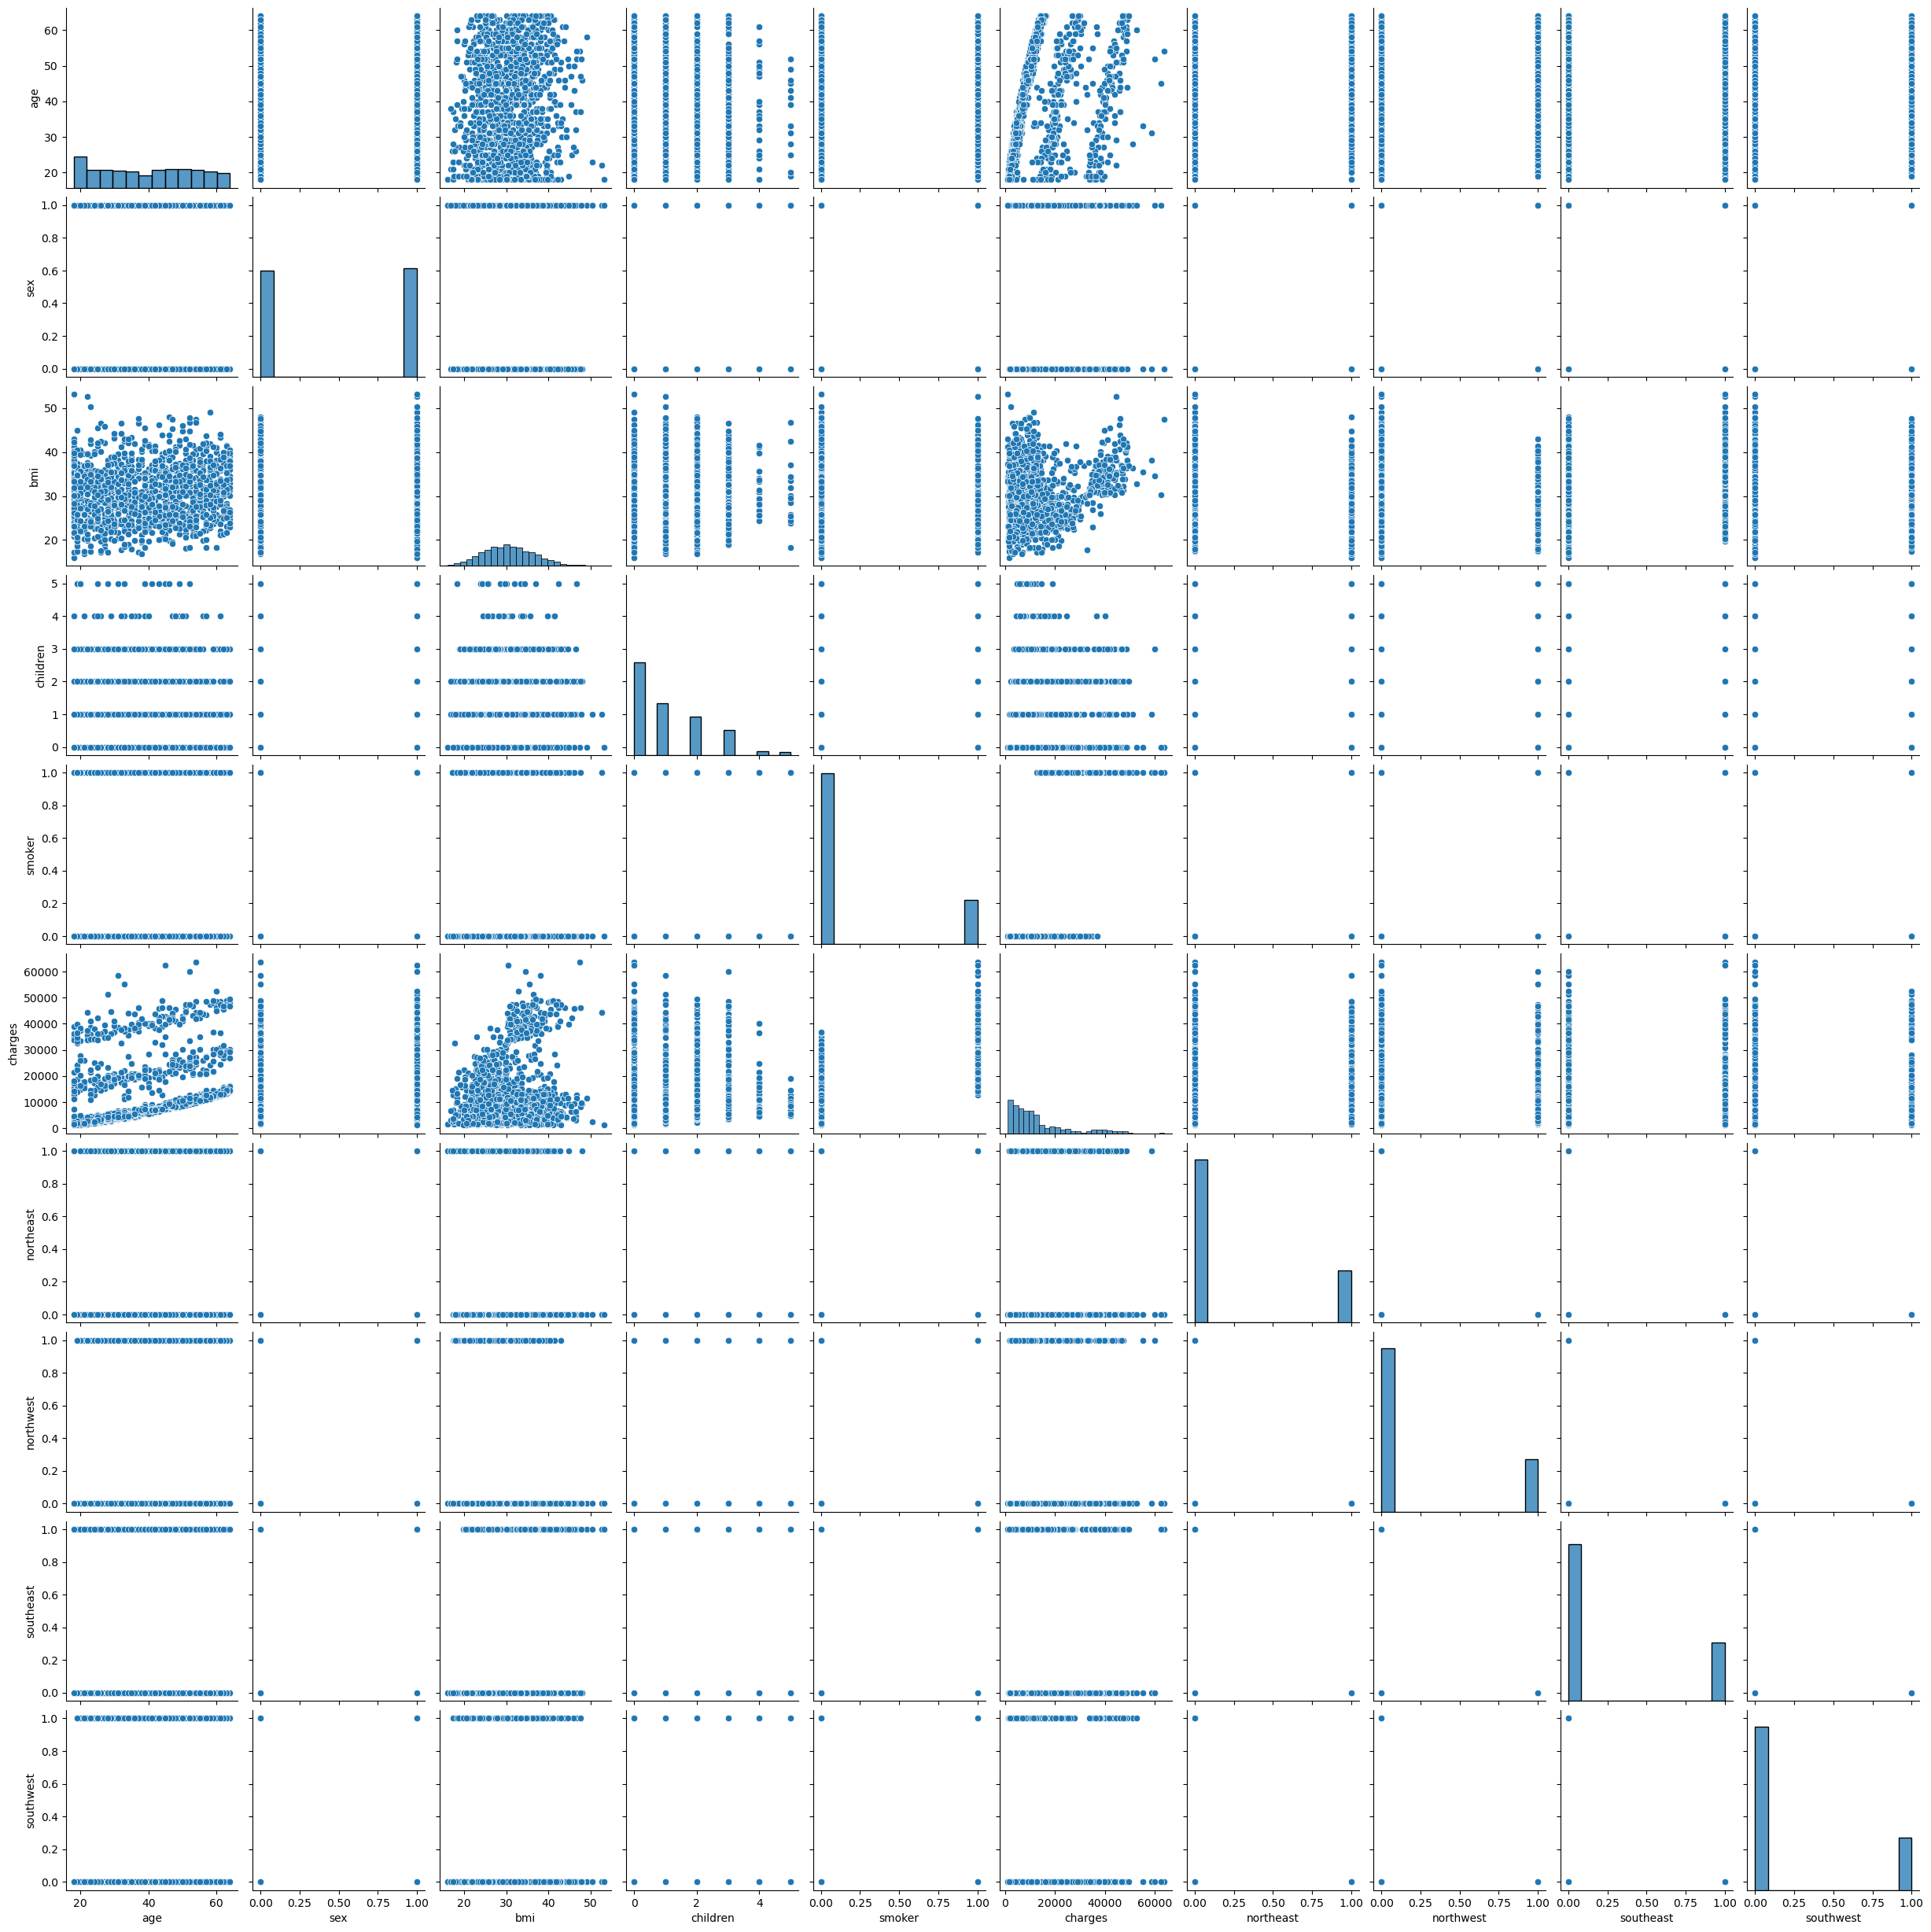

In [90]:
sns.pairplot(df)

In [93]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

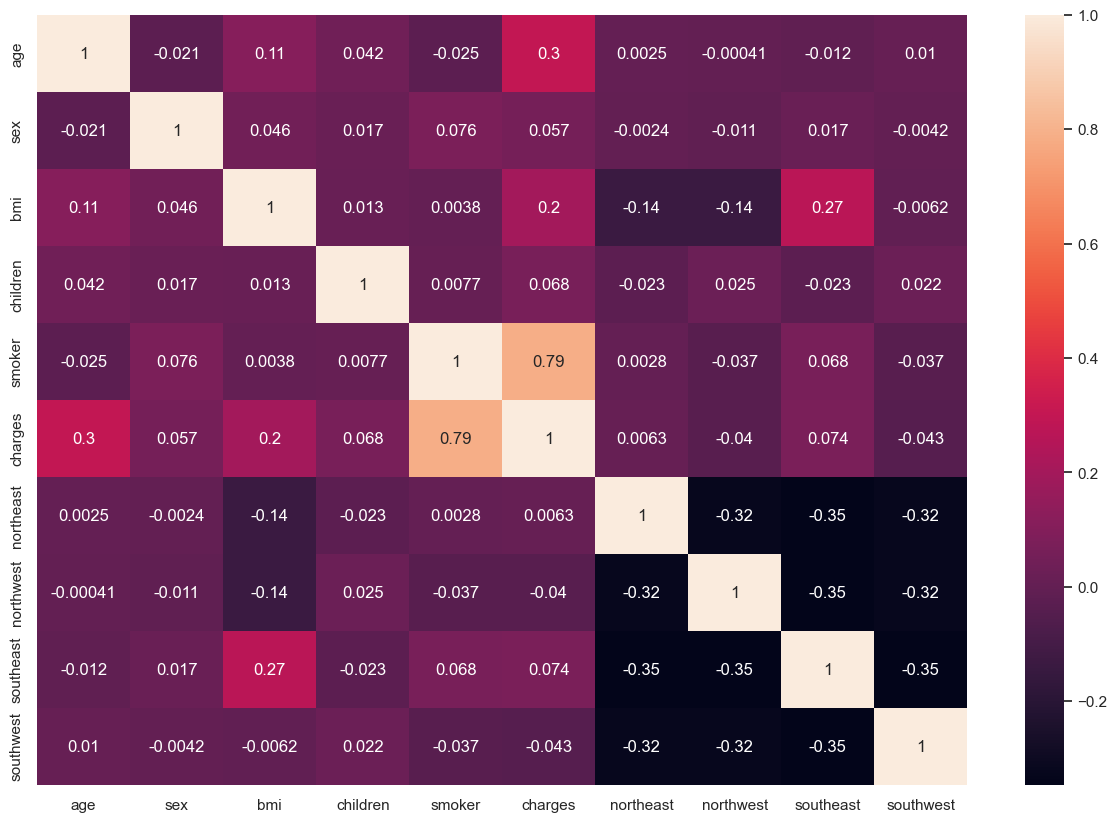

In [92]:
sns.set(rc={"figure.figsize": (15,10)})
sns.heatmap(df.corr(), annot= True)

In [94]:
# Model building
X = df.drop('charges', axis =1)
y= df['charges']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [ ]:
#Standardising the daaset

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


# Applying the Liner regression

In [97]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)
pred_data= regression.predict(X_test)

Text(0, 0.5, 'predicted data')

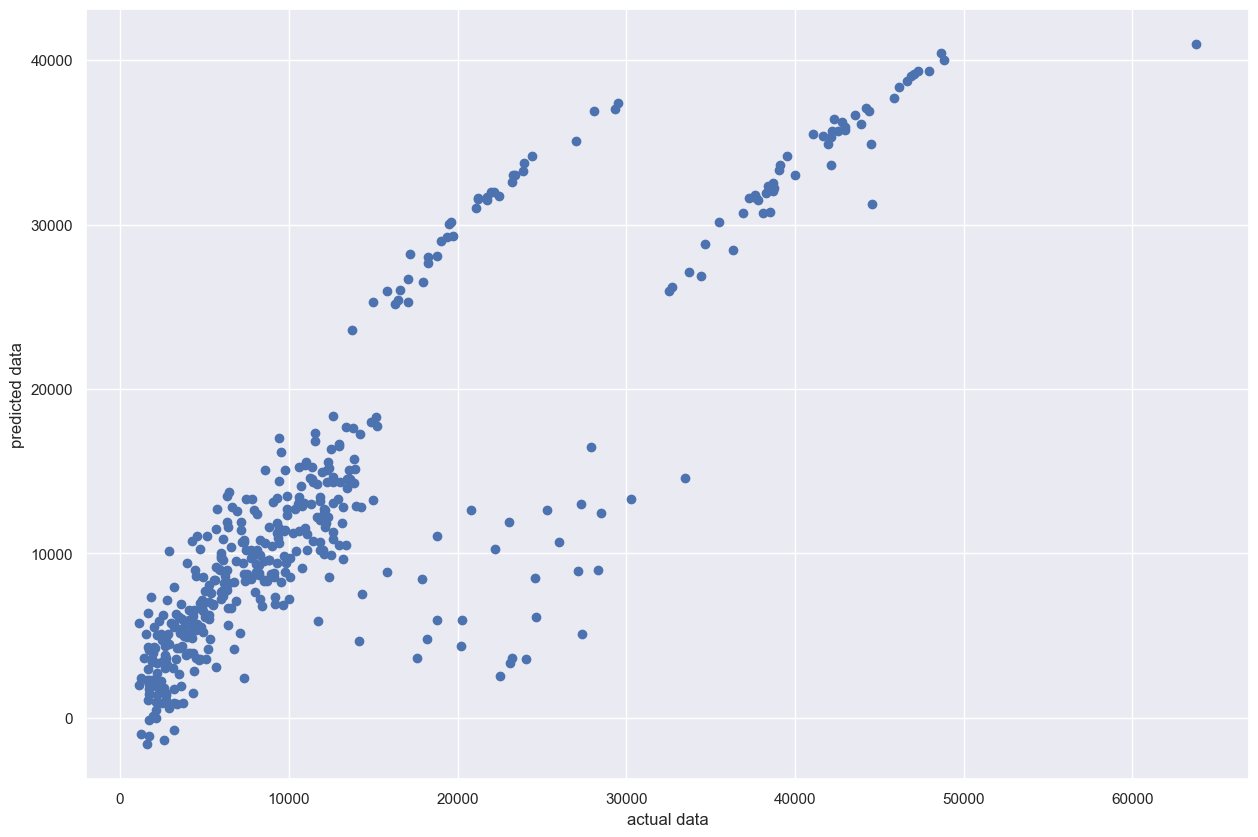

In [98]:
plt.scatter(y_test, pred_data)
plt.xlabel("actual data")
plt.ylabel("predicted data")

In [99]:
residuals = y_test - pred_data

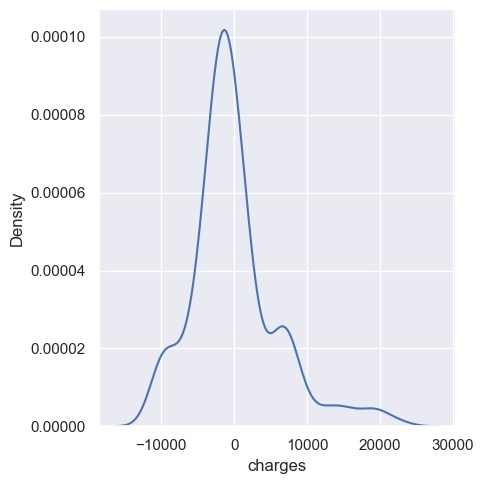

In [100]:
sns.displot(residuals, kind= 'kde')

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, pred_data))
print(mean_absolute_error(y_test, pred_data))
print(np.sqrt(mean_squared_error(y_test, pred_data)))

35090225.72562568
4193.463021932157
5923.700340633857


In [102]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_data)
score

0.7605492639270064

# Using Ridge (L2 regularisation)

In [103]:

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
pred_data= ridge.predict(X_test)

Text(0, 0.5, 'Predicted data output')

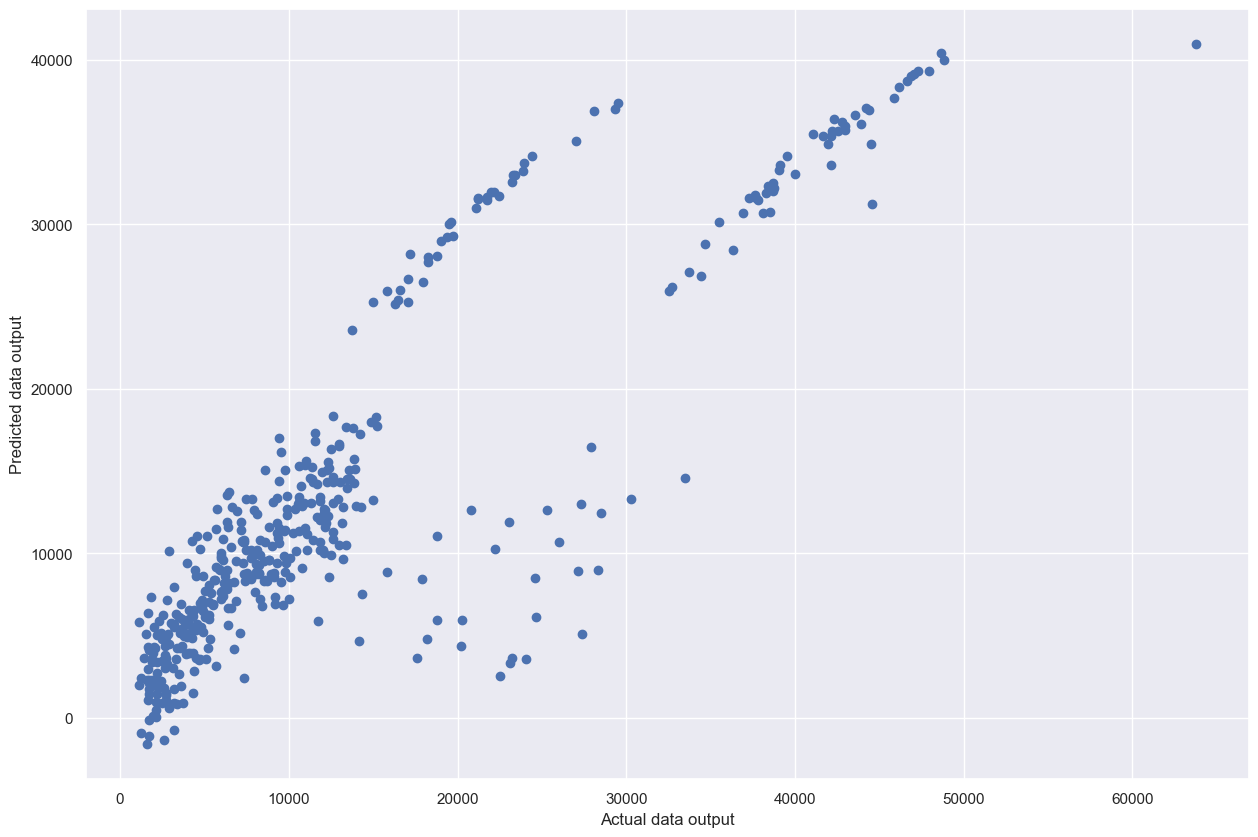

In [105]:
plt.scatter(y_test, pred_data)
plt.xlabel("Actual data output")
plt.ylabel("Predicted data output")

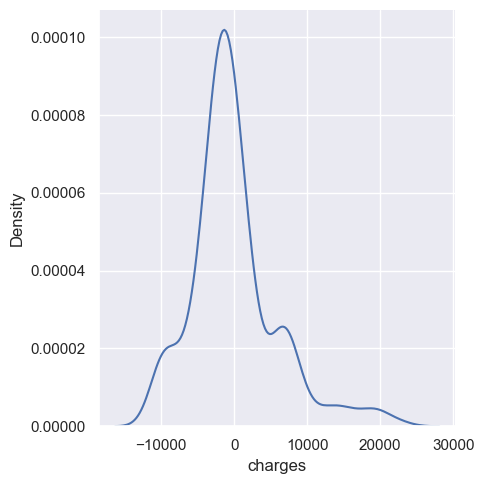

In [107]:
residuals= y_test - pred_data
sns.displot(residuals, kind= 'kde')

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, pred_data))
print(mean_absolute_error(y_test, pred_data))
print(np.sqrt(mean_squared_error(y_test, pred_data)))

35091586.871670134
4194.950790847867
5923.815229366133


In [109]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_data)
score

0.7605399756589628

# using Lasso (L1 Regularisation)


In [110]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
pred_data= lasso.predict(X_test)

Text(0, 0.5, 'Predicted data output')

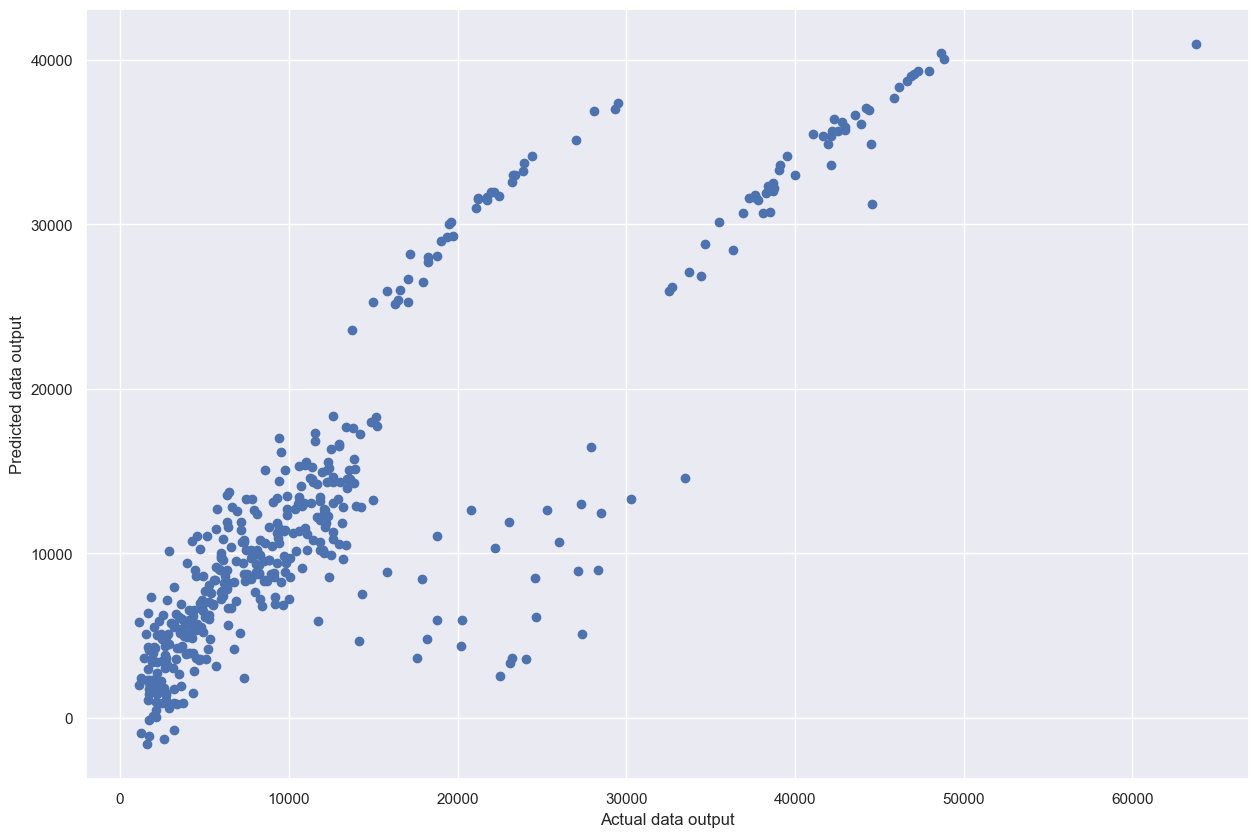

In [111]:
plt.scatter(y_test, pred_data)
plt.xlabel("Actual data output")
plt.ylabel("Predicted data output")

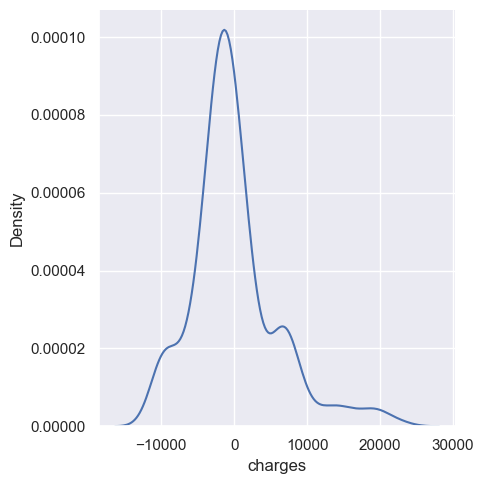

In [112]:
residuals= y_test - pred_data
sns.displot(residuals, kind= 'kde')

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, pred_data))
print(mean_absolute_error(y_test, pred_data))
print(np.sqrt(mean_squared_error(y_test, pred_data)))

35090559.44369504
4193.3943816846895
5923.72850860799


In [114]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_data)
score

0.7605469866821127

# ElasticNet Linear Model

In [136]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(X_train, y_train)
pred_data = EN.predict(X_test)

Text(0, 0.5, 'predicted test data')

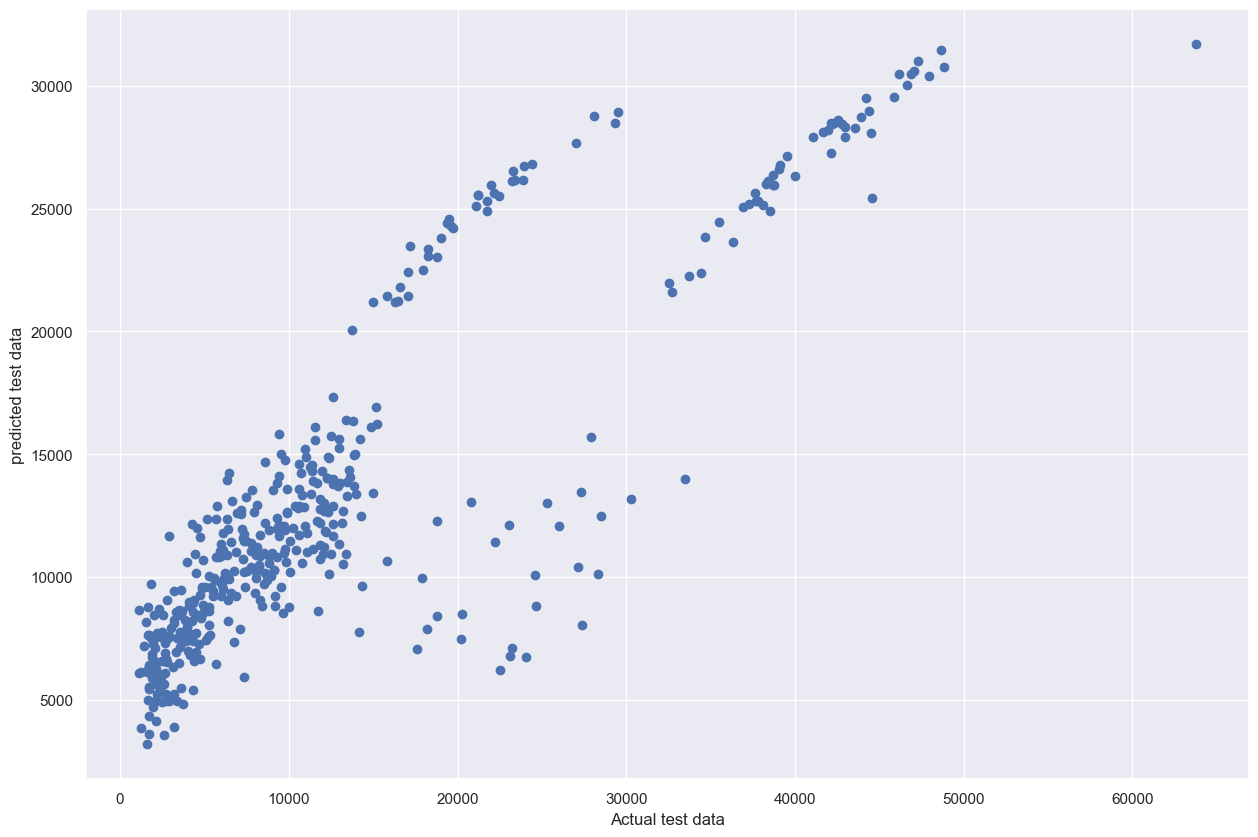

In [137]:
plt.scatter(y_test, pred_data)
plt.xlabel("Actual test data")
plt.ylabel("predicted test data")

In [138]:
residual = y_test - pred_data

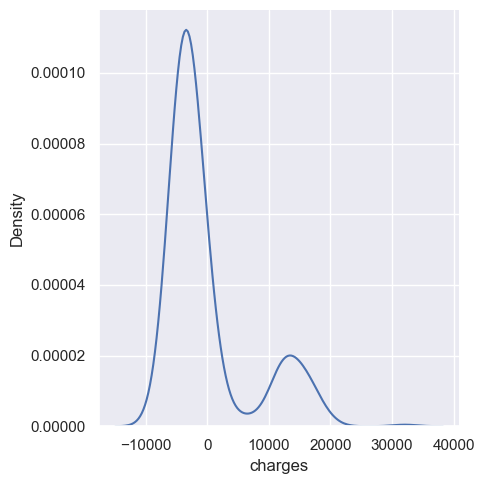

In [139]:
sns.displot(residual, kind = 'kde')

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, pred_data))
print(mean_absolute_error(y_test, pred_data))
print(np.sqrt(mean_squared_error(y_test, pred_data)))

47985463.21529332
5190.321365611101
6927.154048762978


In [141]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_data)
score

0.6725539876104439

In [146]:
# adjusted r2 score
1-(1-score)*(len(y_test)-1)/ (len(y_test)-X_test.shape[1]-1)

0.6657321956856616